# Librería ARCA Arg: Conectando tu Aplicación con los Servicios Web de ARCA AFIP con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](https://relopezbriega.github.io/cv/) en [Matemáticas, Analisis de datos y Python](https://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Cliente de Servicios Web de ARCA en Python" title="Cliente de Servicios Web de ARCA en Python" src="https://relopezbriega.github.io/images/arca_afip.png" >

> Si quieres algo que nunca tuviste, debes estar dispuesto a hacer algo que nunca hiciste

**[Thomas Jefferson](https://es.wikipedia.org/wiki/Thomas_Jefferson)**

## Introducción

Conectar aplicaciones a los [servicios web de ARCA](https://www.afip.gob.ar/ws/) puede ser un dolor de cabeza. Documentación confusa, autenticación engorrosa y pelear contra estrucuturas de datos inconsistentes entre cada servicio. Como estaba armando un proyecto personal y no encontré ninguna librería que sea efectiva para solucionar estos problemas; decidí escribir una propia.

Si necesitas integrar tu aplicación con los [servicios web de ARCA](https://www.afip.gob.ar/ws/), mí librería te proporcionará las herramientas necesarias para hacerlo de manera eficiente, segura y sin complicaciones. En este artículo, te mostraré qué es [Arca Arg](https://github.com/relopezbriega/arca_arg), cómo funciona y como puede ayudarte también a tí en tu proyecto.

## ¿Qué es Arca Arg?

[Arca Arg](https://github.com/relopezbriega/arca_arg) es un cliente en Python para acceder a los servicios web de ARCA (Administración Federal de Ingresos Públicos de Argentina). Maneja la autenticación y la comunicación con los servicios SOAP de ARCA de forma sencilla y permite cominicarse con todos los servicios web de ARCA](https://www.afip.gob.ar/ws/) utilizando la misma interfase.

### Ventajas

Algunas de las ventajas que vas a encontrar al utilizar mi librería son:

* **Simplicidad:** Reduce la cantidad de código necesario para interactuar con los [servicios web de ARCA](https://www.afip.gob.ar/ws/).
* **Seguridad:** Maneja la autenticación y autorización de forma segura y sencilla.
* **Flexibilidad:** Compatible con todos los [servicios web de ARCA](https://www.afip.gob.ar/ws/) y te permite interactuar con ellos utilizando los mismos métodos.
* **Totalmente gratis:** No tienes que pagar absolutamente nada por utlizar mi librería. Es gratis, con licencia MIT y open source; puedes ver todo el código en el [repositorio de github](https://github.com/relopezbriega/arca_arg).

### Características

- Gestión de tokens de autenticación
- Integración con todos los [servicios web de ARCA](https://www.afip.gob.ar/ws/)
- Consultas de las operaciones disponibles en cada servicio y de sus tipos complejos
- Soporte para entornos de producción y homologación

## Cómo Instalar y Configurar Arca Arg

Ahora que sabes por qué deberías usar [Arca Arg](https://github.com/relopezbriega/arca_arg), veamos cómo instalarla y configurarla en tu entorno de desarrollo.

### Instalación Rápida

Para instalar la librería, solo necesitas ejecutar el siguiente comando:

```bash
pip install arca_arg
```
¡Así de fácil! Una vez instalada, estás listo para comenzar a utilizarla.

### Configuración Inicial

Para empezar a interactuar con los servicios en los entornos de homologación, primero vamos a necesitar obtener el certificado y la clave privada y adherirnos a los servicios que vamos a utilizar desde la página de [ARCA](https://www.afip.gob.ar/landing/), accediendo con nuestra clave fiscal. Pero antes de ir a hacer esto, debemos realizar los siguientes pasos: 

1. **Generar la llave utilizando Openssl:** Para la generación de nuestra *key* vamos a usar [OpenSSL](https://www.openssl.org/), el cual ya viene ya instalado en los sistemas Linux. Desde la consola podemos ejecutar:

```bash
openssl genrsa -out [nombre_tu_key].key 2048
```   
Este archivo key es muy importante porque representa la *contraseña* con la que va a funcionar el certificado así que no debemos guardalo en un lugar seguro y no perderlo.

2. **Generar el Certificate Signing Request (csr):** Una vez generada la key estamos listos para generar el CSR. Para ello recurrimos una vez más a [OpenSSL](https://www.openssl.org/). Desde la consola debemos ejecutar el siguiente comando:

```bash
openssl req -new -key [key_generada_punto1].key -subj "/C=AR/O=[nombre empresa]/CN=[nombre certificado]/serialNumber=CUIT [tu CUIT]" -out [nombre archivo].csr
```
En donde:
* `[key_generada_punto1]`  es el nombre del archivo key generado en el paso anterior.

* `[nombre empresa]`  es el nombre de la empresa para quien es el certificado. En el ambiente de homologación podemos utilizar un nombre que haga referencia a que es para el ambiente de test.

* `[nombre certificado]` es el nombre que va a tener nuestro certificado en [ARCA](https://www.afip.gob.ar/landing/). Solo se pueden utilizar letras y números. 

* `[tu CUIT]` es tu CUIT o el de la empresa para quien es el certificado.

* `[nombre archivo]` es el nombre con que quieres que se guarde el archivo CSR. No es tan importante, ya que una vez que utilicemos este archivo para obetner el certificado en [ARCA](https://www.afip.gob.ar/landing/) lo vamos a poder eliminar.

Por ejemplo en mi caso yo utilicé:

```bash
openssl req -new -key rauloTest.key -subj "/C=AR/O=rauloTest/CN=rauloTest/serialNumber=CUIT 20293188204" -out rauloTest.csr

```

3. **Generar el certificado (cert):** Ahora que ya terminamos con estos pasos previos, ya podemos ir al portal de [ARCA](https://www.afip.gob.ar/landing/) y obtener nuestro certificado para homologación.

Dentro de nuestro escritorio de ARCA debemos ingresar en *«WSASS - Autogestión Certificados Homologación»*

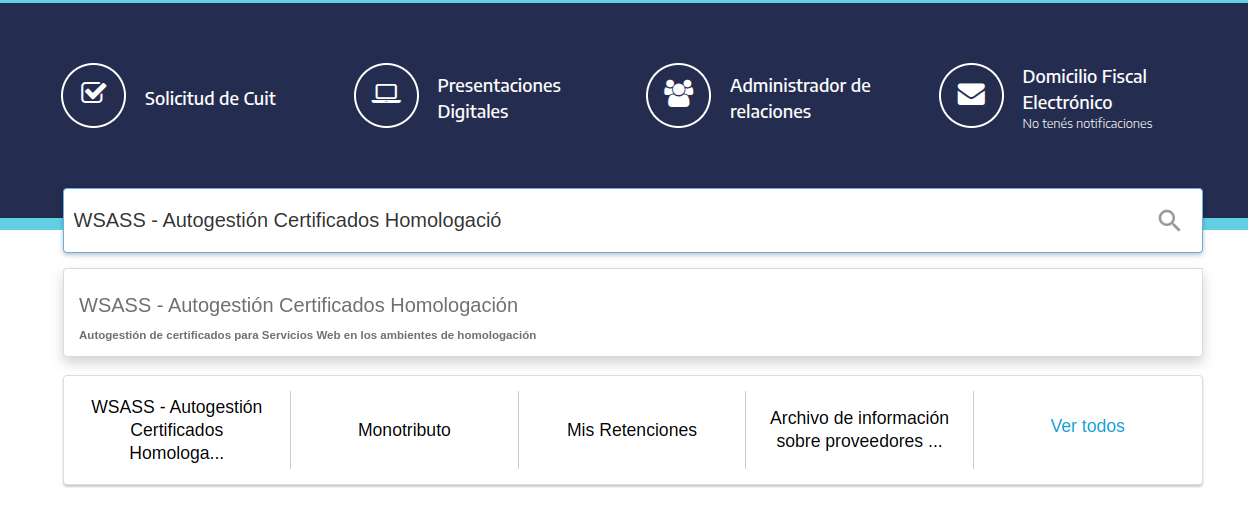

Dentro de esta aplicación debemos ir a *«Nuevo Certificado»*

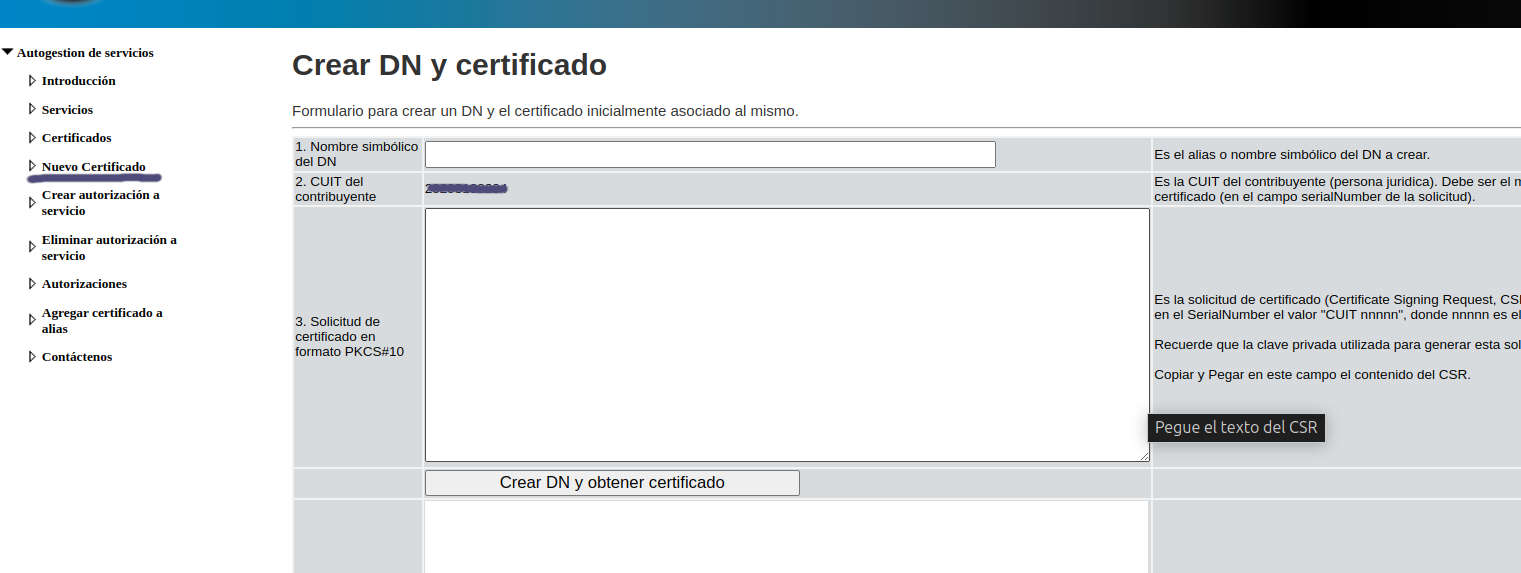

En esta pantalla en `1. Nombre simbólico del DN` ingresamos el nombre con el que generamos el CSR en el punto anterior. En mi ejemplo "rauloTest" (CN=rauloTest).
Y luego en el punto `3. Solicitud de certificado en formato PKCS#10` debemos pegar el contenido del mismo archivo CSR que generamos. Por último, presionamos el botón `Crear DN y obtener certificado` 

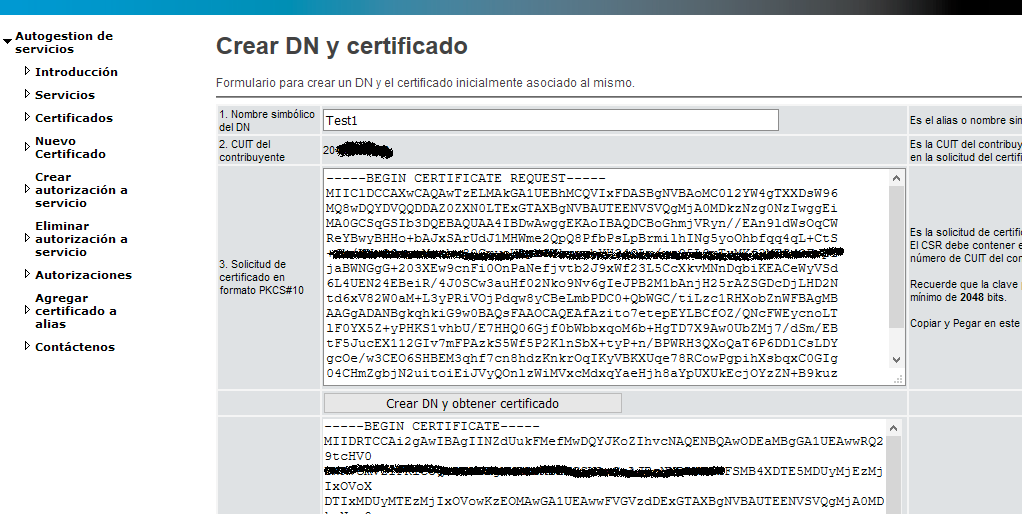

En `resultado` debajo se nos generara el certificado, este debemos copiar el contenido y guardarlo en nuestra computadora junto con la key para usarlo luego en la librería. Yo por ejemplo lo guardo con el formato `archivo.cert` para distinguirlo de otros archivos. 

4. **Autorizar web service de testing:** Por último, para poder utilizar los [servicios web de ARCA](https://www.afip.gob.ar/ws/) con nuestro certificado recién creado; debemos generar la autorización. Esto lo podemos hacer desde la misma aplicación que utilizamos para generar el certificao *«WSASS - Autogestión Certificados Homologación»*.

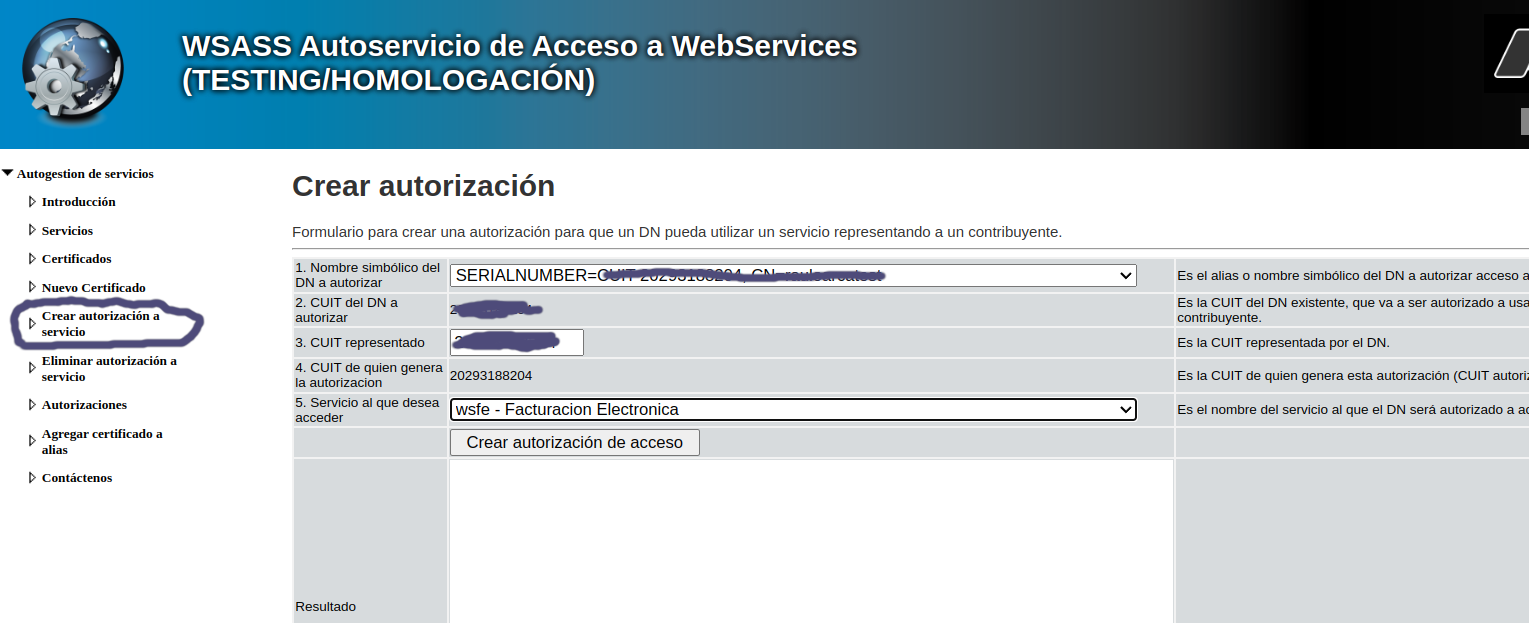

Allí, en `1. Nombre simbólico del DN a autorizar` debemos seleccionar el certificado que queremos autorizar. En `3. CUIT representado` debemos ingresar el CUIT con el cual queremos utilizar el web service. Y en `5. Servicio al que desea acceder` debemos elegir el web service a utilizar. Con todo esto listo debemos presionar en `«Crear autorización de acceso»`y nos devolverá el resultado de la autorización.

Desde esta misma aplicación, podemos también acceder a `«Autorizaciones»` para verificar que se creó la autorización correctamente

## Explorando las Principales Funcionalidades de Arca Arg

Bien, luego de estos laboriosos pasos, ya podemos comenzar a codear y utilizar la liberería. Veamos como utilizarla con un ejemplo del servicio de factura electrónica(WSFE).


In [ ]:
# Instalar librería
!pip install arca_arg

In [1]:
# Importar las variables de configuración
import arca_arg.settings as confg

confg.PRIVATE_KEY_PATH = '/home/raul/arca/HOM/raulotest.key'
confg.CERT_PATH = '/home/raul/arca/HOM/arcaTestCert.pem'
confg.TA_FILES_PATH = '/home/raul/arca/HOM/'
confg.CUIT = '20293188204'
confg.PROD = False

Estás son las principales configuraciones que debemos realizar para que todo funcione correctamente:

* `CUIT` = "TU_CUIT_AQUI"
* `PROD` = False  # True para producción
* `CERT_PATH` = "carpeta con el certificado de arca"
* `PRIVATE_KEY_PATH` = "Carpeta con el la clave privada"
* `TA_FILES_PATH`="donde se guardaran temporalmente los token de acceso"

In [2]:
# Importamos el objeto principal y algunas constantes de ayuda
from arca_arg.webservice import ArcaWebService 
from arca_arg.settings import WSDL_FEV1_HOM, WS_LIST

In [3]:
# Nombre de los principales servicios
# si el servicio que quieres utilizar no está aquí no importa
# es solo una ayuda de los nombres de los servicos para iniciar
# el webservide
WS_LIST

['ws_sr_constancia_inscripcion',
 'ws_sr_padron_a10',
 'ws_sr_padron_a13',
 'wsfecred',
 'wsfe',
 'wsfex',
 'wslpg',
 'wscpe',
 'wsapoc',
 'wsagr',
 'wsrgiva',
 'wsct',
 'sire-ws',
 'wsremharina',
 'wsremazucar',
 'wsremcarne']

In [4]:
# Servicio de Factuara Electrónica
arca = ArcaWebService(WSDL_FEV1_HOM, 'wsfe', enable_logging= False) 

Para inicar el serviocio utilizamos el objeto `ArcaWebService` con la url del WSDL del servicio (que en este caso ya la recuperamos desde las constantes de las configuraciones de la libería); el nombre del servico (que es uno de los nombres de la lista de ayuda); y tenemos un parámetro opcional para habilitar/desabilitar el logging(está habilitado por defecto).

In [5]:
# listamos los request que podemos realizar en el servicio
print(arca.list_methods())

['FECAESolicitar', 'FECompTotXRequest', 'FEDummy', 'FECompUltimoAutorizado', 'FECompConsultar', 'FECAEARegInformativo', 'FECAEASolicitar', 'FECAEASinMovimientoConsultar', 'FECAEASinMovimientoInformar', 'FECAEAConsultar', 'FEParamGetCotizacion', 'FEParamGetTiposTributos', 'FEParamGetTiposMonedas', 'FEParamGetTiposIva', 'FEParamGetTiposOpcional', 'FEParamGetTiposConcepto', 'FEParamGetPtosVenta', 'FEParamGetTiposCbte', 'FEParamGetCondicionIvaReceptor', 'FEParamGetTiposDoc', 'FEParamGetTiposPaises', 'FEParamGetActividades', 'FECAESolicitar', 'FECompTotXRequest', 'FEDummy', 'FECompUltimoAutorizado', 'FECompConsultar', 'FECAEARegInformativo', 'FECAEASolicitar', 'FECAEASinMovimientoConsultar', 'FECAEASinMovimientoInformar', 'FECAEAConsultar', 'FEParamGetCotizacion', 'FEParamGetTiposTributos', 'FEParamGetTiposMonedas', 'FEParamGetTiposIva', 'FEParamGetTiposOpcional', 'FEParamGetTiposConcepto', 'FEParamGetPtosVenta', 'FEParamGetTiposCbte', 'FEParamGetCondicionIvaReceptor', 'FEParamGetTiposDoc',

In [6]:
# Si queremos utilizar FECAESolicitar
# podemos usar la ayuda para revisar sus parámetros.
arca.method_help('FECAESolicitar')

'FECAESolicitar(Auth: ns0:FEAuthRequest, FeCAEReq: ns0:FECAERequest) -> FECAESolicitarResult: ns0:FECAEResponse'

In [7]:
# Vemos que tiene un tipo FEAuthRequest y un tipo FECAERequest
# podemos revisar la definición de estos tipos con el siguiente método
arca.get_type('FEAuthRequest')

{
    'Token': None,
    'Sign': None,
    'Cuit': None
}

In [8]:
arca.get_type('FECAERequest')

{
    'FeCabReq': 'FECAECabRequest',
    'FeDetReq': 'ArrayOfFECAEDetRequest'
}

In [9]:
arca.get_type('FECAECabRequest')

{
    'CantReg': None,
    'PtoVta': None,
    'CbteTipo': None
}

Esto ya nos da una idea de como es la estructura del request que debemos enviar al servicio. Lo bueno es que también podemos utilizar el método `get_type`como armazón para el request asignandolo a una variable.

In [10]:
# Armando los datos para el request
Auth = arca.get_type('FEAuthRequest')
Auth['Token'] = arca.token
Auth['Sign'] = arca.sign
Auth['Cuit'] = arca.cuit

In [11]:
FeCabReq = arca.get_type('FECAECabRequest')
FeCabReq['CantReg'] = 1
FeCabReq['PtoVta'] = 1
FeCabReq['CbteTipo'] = 1

In [15]:
# Esto es opcional también se pueden generar los datos con diccionarios
FECAEDetRequest = {
        'Concepto' : 1,
        'DocTipo' : 80,
        'DocNro': 27293188217,
        'CbteDesde': 7,
        'CbteHasta': 7,
        'CbteFch': "20250124",
        'ImpTotal':121,
        'ImpTotConc': 0,
        'ImpNeto': 100,
        'ImpOpEx': 0,
        'ImpIVA': 21,
        'ImpTrib': 0,
        'MonId': "PES",
        'MonCotiz':1,
        'Iva': {'AlicIva': {'Id': 5, 'BaseImp': 100, 'Importe': 21}}
}

In [16]:
# Terminamos de unir los datos para enviar el request
data = {'Auth': Auth, 
        'FeCAEReq': { 'FeCabReq': FeCabReq, 'FeDetReq': {'FECAEDetRequest': FECAEDetRequest}}
       }

In [17]:
# Enviamos el request y obtenemos la respuesta del servicio
arca.send_request('FECAESolicitar', data)

{
    'FeCabResp': {
        'Cuit': 20293188204,
        'PtoVta': 1,
        'CbteTipo': 1,
        'FchProceso': '20250128183526',
        'CantReg': 1,
        'Resultado': 'A',
        'Reproceso': 'N'
    },
    'FeDetResp': {
        'FECAEDetResponse': [
            {
                'Concepto': 1,
                'DocTipo': 80,
                'DocNro': 27293188217,
                'CbteDesde': 7,
                'CbteHasta': 7,
                'CbteFch': '20250124',
                'Resultado': 'A',
                'Observaciones': {
                    'Obs': [
                        {
                            'Code': 10217,
                            'Msg': 'El credito fiscal discriminado en el presente comprobante solo podra ser computado a efectos del Procedimiento permanente de transicion al Regimen General.'
                        }
                    ]
                },
                'CAE': '75044220307741',
                'CAEFchVto': '20250203'
           

Como podemos ver, es bastante simple y fácil utilizar la libería. Veamos otro ejemplo con otro servicio para demostrar que la interface es exactamente igual.

In [18]:
from arca_arg.settings import WSDL_CONSTANCIA_HOM

In [19]:
arca2 = ArcaWebService(WSDL_CONSTANCIA_HOM, 'ws_sr_constancia_inscripcion', enable_logging=False)

In [20]:
arca2.list_methods()

['getPersona', 'getPersonaList', 'getPersona_v2', 'dummy', 'getPersonaList_v2']

In [21]:
# Request dummy para verificar el estado del servicio
arca2.send_request('dummy', {})

{
    'appserver': 'OK',
    'authserver': 'OK',
    'dbserver': 'OK'
}

In [22]:
# ver que necesitamos para usar getPersona_v2
arca2.method_help('getPersona_v2')

'getPersona_v2(token: xsd:string, sign: xsd:string, cuitRepresentada: xsd:long, idPersona: xsd:long) -> personaReturn: ns0:personaReturn'

In [23]:
# En este caso no hay tipos complejos podemos armar los datos directamente
data = {
    'token':arca2.token,
    'sign': arca2.sign,
    'cuitRepresentada': arca2.cuit,
    'idPersona':20224107030
}

In [24]:
arca2.send_request('getPersona_v2', data)

{
    'datosGenerales': {
        'apellido': 'FRANCO AGUSTIN',
        'caracterizacion': [
            {
                'descripcionCaracterizacion': 'CUENTA CORRIENTE',
                'idCaracterizacion': 82,
                'periodo': 20160714
            },
            {
                'descripcionCaracterizacion': 'CATEGORÍA A: MUY BAJO RIESGO',
                'idCaracterizacion': 354,
                'periodo': 20161025
            }
        ],
        'dependencia': None,
        'domicilioFiscal': {
            'codPostal': '1828',
            'datoAdicional': None,
            'descripcionProvincia': 'BUENOS AIRES',
            'direccion': 'ALEM 5982',
            'idProvincia': 1,
            'localidad': 'BANFIELD',
            'tipoDatoAdicional': None,
            'tipoDomicilio': 'FISCAL'
        },
        'esSucesion': 'NO',
        'estadoClave': 'ACTIVO',
        'fechaContratoSocial': None,
        'fechaFallecimiento': None,
        'idPersona': 20224107030,
 

## Errores Comunes y Cómo Evitarlos

Incluso con una librería bien diseñada, pueden surgir problemas. Aquí te dejo algunos errores comunes y cómo solucionarlos.

1. **Credenciales Incorrectas:** Si recibes un error de autenticación, verifica que estás usando la API Key y el Secret correctos.

2. **Endpoints Incorrectos:** Asegúrate de que estás llamando al endpoint correcto. Un error tipográfico puede hacer que tu petición falle.

3. **Problemas de Conectividad:** Si experimentas fallos intermitentes, revisa tu conexión a internet y asegúrate de que los servidores de Arca están operativos.

Con esto concluye está presentación. Recuerden que también pueden consultar el código en [Github](https://github.com/relopezbriega/arca_arg)

Saludos!

*Este post fue escrito por [Raúl e. López Briega](https://relopezbriega.github.io/) utilizando [Jupyter notebook](https://jupyter.org/). Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/Arca_arg.ipynb) o ver su version estática en [nbviewer](https://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/Arca_arg.ipynb).*